In [1]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = np.load("/home/kevo/Escritorio/mlds6/tdsp_template_grupo8/scripts/preprocessing/train_test_array.npz")
X_train = data['X_train']
y_train = data['y_train']
X_test = data['X_test']
y_test = data['y_test']
print(f'Dimensiones X_train: {X_train.shape}')
print(f'Dimensiones X_test: {X_test.shape}')
print(f'Dimensiones y_train: {y_train.shape}')
print(f'Dimensiones y_test: {y_test.shape}')

Dimensiones X_train: (76916, 15)
Dimensiones X_test: (19230, 15)
Dimensiones y_train: (76916,)
Dimensiones y_test: (19230,)


In [ ]:
param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300, 400, 500],
}

In [ ]:
grid_clf = GridSearchCV(LogisticRegression(random_state=3),
                   verbose=1,
                   return_train_score=True
                   )
grid_clf.fit(X_train, y_train)

grid_clf = GridSearchCV(SVC(kernel='rbf'),
                   param_grid=param_grid,
                   verbose=1,
                   return_train_score=True
                   )

In [9]:
model = LogisticRegression(random_state=3).fit(X=X_train,y=y_train)

In [21]:
predictions = model.predict(X_test)


In [24]:
accuracy_score(y_test, predictions)

0.959594383775351

In [50]:
cm = confusion_matrix(y_true=y_test, y_pred=predictions)

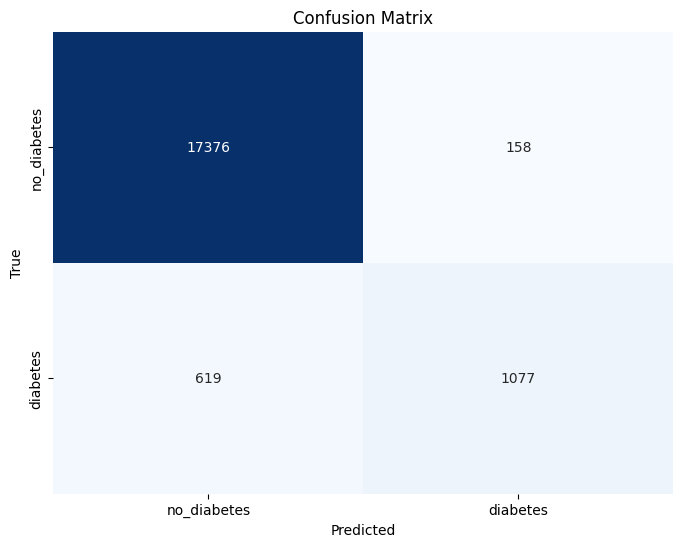

In [69]:
labels=['no_diabetes', 'diabetes']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False, xticklabels=labels , yticklabels= labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()